# Домашняя работа № 20

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data1 = pd.DataFrame()
# header_list = ['sepal length (cm)','sepal width (cm)','variety']
data1 = data[['sepal length (cm)', 'sepal width (cm)']]
# data1 = data1.reindex(columns = header_list)
data1.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data_class, test_size=0.25)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(X_test)

array([0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1])

In [11]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,2,1
3,1,2
4,1,2
5,0,0
6,2,1
7,2,2
8,0,0
9,0,0


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, lda.predict(X_test))

0.6842105263157895

In [14]:
lda.coef_

array([[-5.86250956,  7.66842217],
       [ 1.31540345, -3.26252798],
       [ 4.00217723, -3.43611607]])

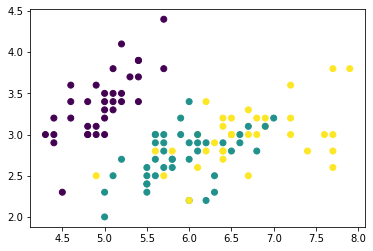

In [15]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [16]:
lda.means_

array([[4.97058824, 3.38235294],
       [5.91904762, 2.73571429],
       [6.65833333, 2.97777778]])

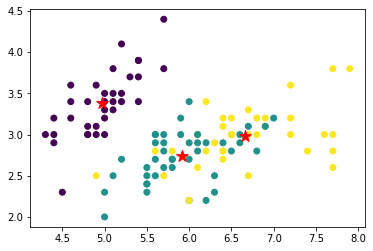

In [18]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

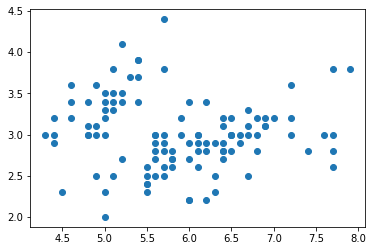

In [23]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [25]:
X_scaled = scaler.fit_transform(X_train)

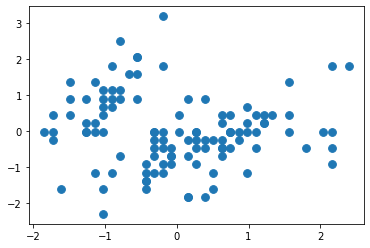

In [26]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [27]:
from sklearn.cluster import KMeans

In [34]:
k_inertia = []

In [35]:
ks = range(1, 10)

In [36]:
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

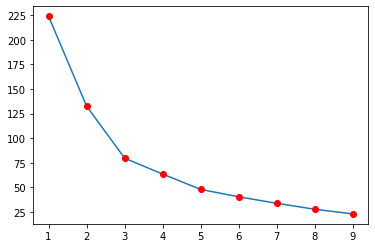

In [37]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Судя по графику локтя оптимальным количеством кластеров будет 3 или 4. Визуализируем для 3-х кластеров:

In [38]:
kmeans = KMeans(n_clusters=3)

In [39]:
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0,
       0, 2])

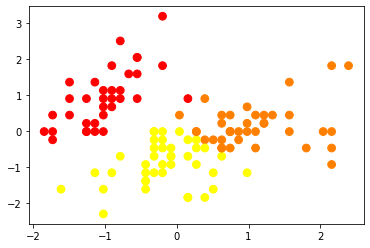

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)